In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [8]:


d1= pd.read_csv('training.csv')

In [9]:
d1.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [10]:
d1.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
d1.shape

(4920, 133)

In [12]:
d1.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [13]:
name_value=(d1['prognosis'].unique())
print(name_value)

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [14]:
X=d1.iloc[:,:-1]
y=d1.iloc[:,-1:]
encoder=LabelEncoder()

y['prognosis']=encoder.fit_transform(y['prognosis'])
code_value=y['prognosis'].unique()
name_value=sorted(name_value)

m=[x  for x in range(len(name_value))]
name_maper={m[i]:name_value[i] for i in range(len(name_value))}


C:\Users\Ranjeeta\AppData\Local\Temp\ipykernel_7844\130626127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['prognosis']=encoder.fit_transform(y['prognosis'])


In [15]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=21,test_size=0.2,shuffle=True)

In [16]:
logreg = LogisticRegression()
finaltestedmodel=logreg.fit(X_train, y_train)
Y_predLR = logreg.predict(X_test)
print("Train Accuracy: ",round(accuracy_score(y_train, logreg.predict(X_train))*100,2))
print("Test Accuracy: ",round(accuracy_score(y_test, Y_predLR) * 100,2))

c:\Users\Ranjeeta\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy:  100.0
Test Accuracy:  100.0


In [17]:
y_test.value_counts().sum()
print(type(Y_predLR))
df = pd.DataFrame(Y_predLR, columns = ['Result'])
print(type(df))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
train_table= pd.DataFrame({
    'Expected result':[name_maper[p[0]] for p in df.values],
    'Predicted':[name_maper[m[0]] for m in df.values]

})
print(train_table)
#train_table.sort_values(ascending=False,by='Predicted')

             Expected result                Predicted
0        Chronic cholestasis      Chronic cholestasis
1    Urinary tract infection  Urinary tract infection
2               Tuberculosis             Tuberculosis
3            Hyperthyroidism          Hyperthyroidism
4            Hyperthyroidism          Hyperthyroidism
..                       ...                      ...
979              Chicken pox              Chicken pox
980                  Typhoid                  Typhoid
981              Common Cold              Common Cold
982           Hypothyroidism           Hypothyroidism
983                 Migraine                 Migraine

[984 rows x 2 columns]


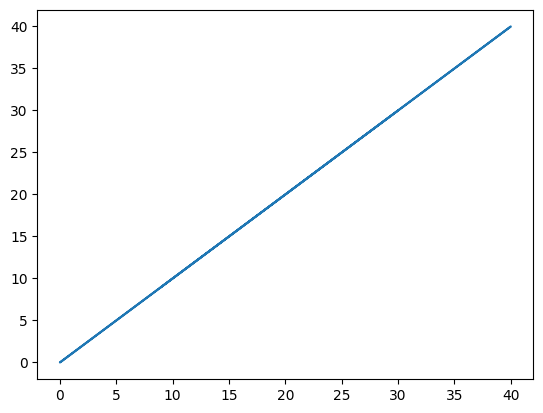

In [27]:
import matplotlib.pyplot as plt
plt.plot(y_test,Y_predLR)
plt.show()

In [20]:
import pickle


In [21]:
pickle.dump(finaltestedmodel,open('model.pkl','wb'))


In [22]:
model=pickle.load(open('model.pkl','rb'))

k=list(d1)
for i in range(len(k)):
    if k[i].__contains__('_'):
        k[i]=k[i].replace('_'," ")
l=open('l.txt','w')
l.write(str(k))
l.close()


In [23]:
symptoms = X.columns.values
symptom_index={}
for index, value in enumerate(symptoms):
    symptom = value
    symptom_index[index] = value
  
data_dict = {
    
    "predictions_classes":encoder.classes_,
    "symptom_index":symptom_index
}
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = int(symptom)
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    final_pred=model.predict(input_data)[0]
    return final_pred


print(name_maper[predictDisease("1,5,9,49,32,11")])    


GERD


c:\Users\Ranjeeta\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
